<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Stats reference
              
</p>
</div>

Data Science Cohort Live NYC May 2023
<p>Phase 2</p>
    

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
titanic_file = 'https://github.com/MrGeislinger/flatiron-school-data-science-curriculum-resources/raw/main/ProbabilityAndStats/StatisticalDistributions/data/titanic.csv'
df_titanic = pd.read_csv(titanic_file)
ages = df_titanic.Age.dropna()

# Confidence Interval
> "The **95%** in a **95% confidence interval** tells us that if we calculated a confidence interval from **100** different samples, about **95** of them would contain the **true population mean**."

-- [Crash Course Statistic's video on Confidence Intervals](https://youtu.be/yDEvXB6ApWc)

In [ ]:
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [10]:
sample = ages.sample(10, replace=True)
n = len(sample)
sample_mean = np.mean(sample)

In [13]:
# Find the confidence interval
stats.t.interval(confidence=0.95,
                 loc = sample_mean,
                 scale = stats.sem(sample),
                 df=n-1);

# Normal Distribution
We'll find that the **normal distribution** or **normal curve** or **bell curve** (it has many names) is a very common distribution and it's very useful to us in statistics.

Turns out the normal distribution describes many phenomena. Think of anything that has a typical range:

- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- heart rate

### The Empirical Rule
> Rule states that $68\%$ of the values of a normal distribution of data lie within 1 standard deviation ($\sigma$) of the mean, $95\%$ within $2\sigma$, and $99.7\%$ within $3\sigma$.   

### Z Distribution
A special normal distribution called the **standard normal distribution** has a mean of 0 and variance of 1. This is also known as a **z distribution**.

**Z-Value**

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$\frac{x - \mu}{\sigma}$$

We call this process **standardization**.

In [31]:
# Calculate the z-score for that Titanic's Age
(ages.values[0] - ages.mean()) / ages.std()

-0.5300050983330725

In [32]:
# Standardize the column
mu = ages.mean()
sigma = ages.std()
standardized_rate = [(x-mu)/sigma for x in ages]

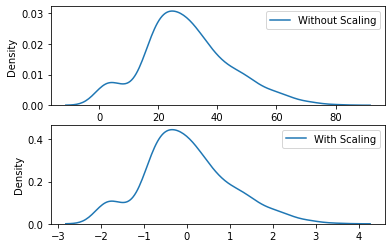

In [33]:
# Visualize it
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False)
# Can toggle sharex to see the impact of the scale

sns.kdeplot(ages, ax=ax1, label='Without Scaling')
ax1.legend()

sns.kdeplot(standardized_rate, ax=ax2, label='With Scaling')
ax2.legend()

plt.show()

# Z Test
Today we will focus on performing a **$z$-test** which is a hypothesis test that uses the normal curve. So we will find the $z$-score of our sample's mean also known as our **$z$-statistic** in the context of hypothesis testing.

### Hypothesis Testing
1. State the null hypothesis and the alternative hypothesis
2. Specify significance level ($\alpha$)
3. Calculate test statistic (z-statistic)
4. Calculate p-value
5. Interpret p-value (reject or fail to reject the null hypothesis)

If $p \lt \alpha$, we reject the null hypothesis.:

If $p \geq \alpha$, we fail to reject the null hypothesis.

In [30]:
x_bar = np.mean(ages)
mu = 30 # Example population mean
n = len(ages)
std = 4 # Example population std

z = (x_bar - mu)/(4/np.sqrt(n))
z

-2.0099526717430813

In [23]:
# we can use stats to calculate the percentile
print(stats.norm.cdf(z))

# We can also use the survival function to calculate the probability
print(stats.norm.sf(z))

0.012374240854219369
0.9876257591457807


# T Test
We'll typically assume that our continuous variables come from normal distributions. But if we have a small sample size or don't know the population standard deviation, we have to make a *correction* to  the normal distribution. This is what the $t$-test effectively does for us by using a $t$-distribution over the normal distribution.

**False positives** are **type 1 errors** and occur when we _reject the null hypothesis_ (favoring the alternative hypothesis) but the "truth" is that we should have _failed to reject_ (favoring the null hypothesis).

**False negatives** are **type 2 errors** and occur when we _fail to reject the null hypothesis_ (favoring the null hypothesis) but the "truth" is that we should have _rejected the hypothesis_ (favoring the alternative hypothesis).

In [27]:
print(f'Sample mean: {np.mean(ages):.1f}')
print(f'Sample std: {np.std(ages):.1f}')

Sample mean: 29.7
Sample std: 14.5


In [29]:
# Using Python to perform test
result = stats.ttest_1samp(ages, popmean=30)
t_stat, p_value = result
result

TtestResult(statistic=-0.5534583115970276, pvalue=0.5801231230388639, df=713)

We used SciPy above to calculate our $t$-value and ultimately our p-value from the $t$-distribution. 

Alternatively, we can convert our significance level $\alpha$ using the $t$-distribution to get our **critical value $t^*$**. We then can compare $t^*$ with our $t$-statistic to determine if it's significant.

In [35]:
# Let's continue to assume our alpha is 0.05
x_bar = 30
mu = 15
sample_std = np.std(ages)
n = len(ages)

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

27.611105617765602

In [36]:
# Calculate our t-critical value t*
stats.t.ppf(0.05, n-1)

-1.6469935469401817

We can again confidently reject our null hypothesis since the absolute value of our $t$-statistic is larger than that of our critical value $t^*$.

# Two Sample T Test

> Image from Walla Walla University: https://inverts.wallawalla.edu/Mollusca/Bivalvia/Mytiloida/Mytilidae/Mytilus_trossulus.html

In [38]:
# Data found from above URL
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

# Nice DF for us
data = []
data += [('tillamook', v) for v in tillamook]
data += [('newport', v) for v in newport]
data += [('petersburg', v) for v in petersburg]
data += [('magadan', v) for v in magadan]
data += [('tvarminne', v) for v in tvarminne]

df = pd.DataFrame(data=data, columns=['area','shell_standardized'])
df.sample(8)


,area,shell_standardized
22,petersburg,0.0968
0,tillamook,0.0571
34,tvarminne,0.1026
27,magadan,0.0781
30,magadan,0.0697
20,petersburg,0.0817
8,tillamook,0.0923
2,tillamook,0.0831


In [40]:
# Peform the two-sample t-test (are the samples different?)
print(stats.ttest_ind(tillamook, newport))
print(stats.ttest_ind(tillamook, newport, equal_var=False))

Ttest_indResult(statistic=1.0716884657515313, pvalue=0.2997596910660227)
Ttest_indResult(statistic=1.112729859319956, pvalue=0.2823978786684557)


And we see that we don't have a significant result between these two (don't reject $H_0$)

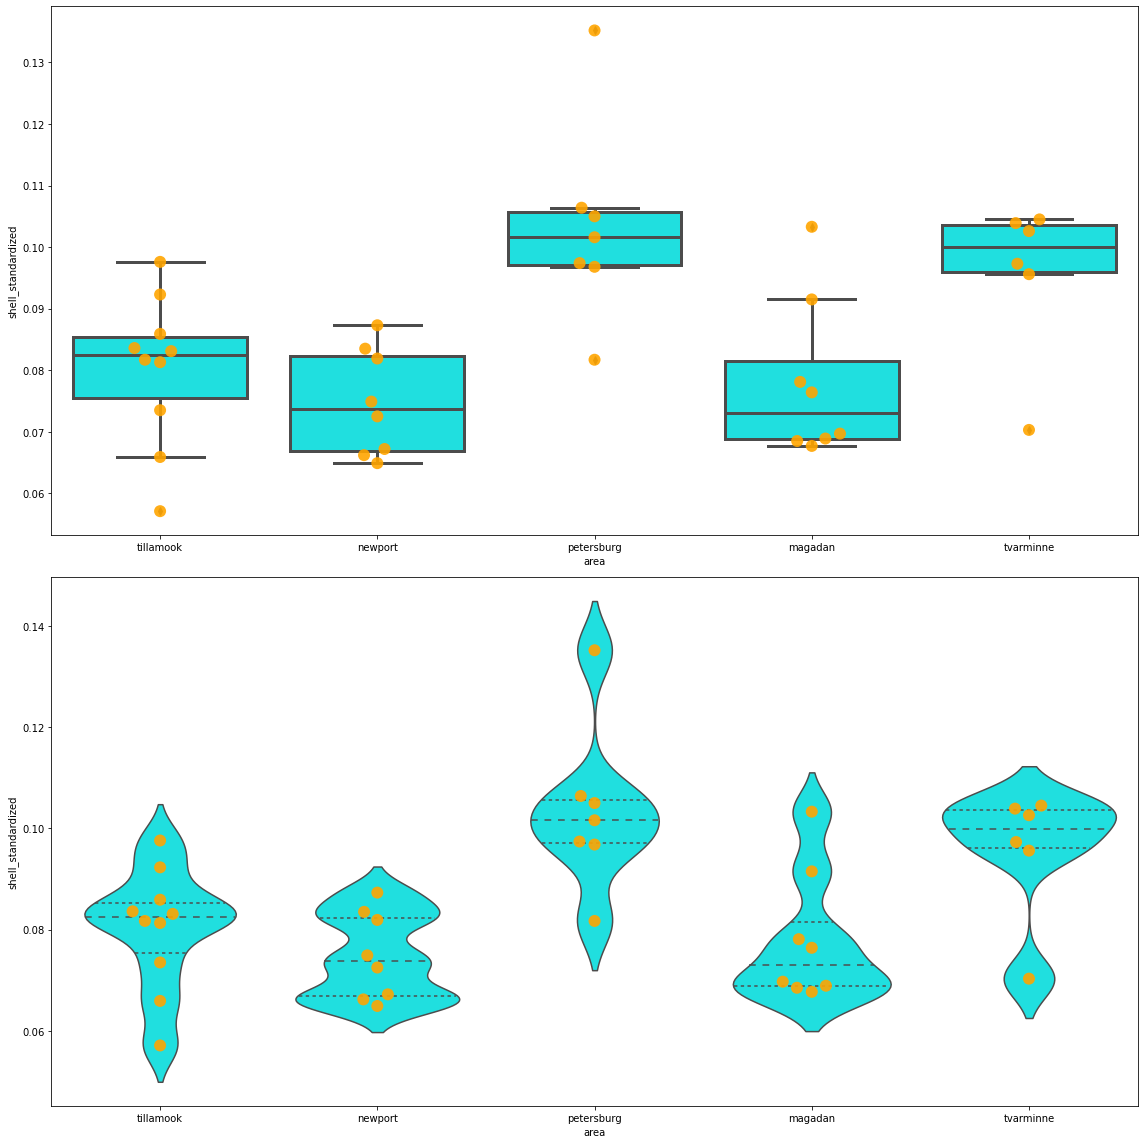

In [41]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(16, 16))

sns.boxplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax0,
    color='aqua', 
    linewidth=3
)

sns.swarmplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax0,
    color='orange', 
    alpha=0.9, 
    size=12
)



sns.violinplot(
    y="shell_standardized", 
    x="area", 
    data=df, 
    ax=ax1,
    color='aqua',
    inner="quartile",  # Seeing the mean and quartiles
    bw=.3              # How much smoothing do we use
)

sns.swarmplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax1,
    color='orange', 
    alpha=0.9, 
    size=12
)

plt.tight_layout();

# ANOVA
One solution to the multiple comparison problem is to perform a statistical test that looks at _all_ the samples together to determine if they are statistically different. 

One such test is the **analysis of variance** or **ANOVA test** (also called the **$F$ one-way test**).

## The $F$-Statistic
We won't dig into the math, since honestly we don't need to do it by hand generally. But know the $F$-statistic is trying to capture the variance _between groups_ and _within groups_. This is done by comparing the individuals with the group means and the overall mean.

The $F$-distribution therefore has **two** degrees-of-freedom parameters, and can in fact be thought of as a ratio of $\chi^2$ distributions.

In [42]:
# Define our alpha significance level
alpha = 0.01

In [43]:
groups = {'tillamook':tillamook, 'newport':newport, 'magadan':magadan,
          'tvarminne':tvarminne, 'petersburg':petersburg}

# Note I'm simply unpacking the iterator instead of typing each out
result = stats.f_oneway(*groups.values())
f_stat, p = result
# Printing out the result just to show what it looks like
result

F_onewayResult(statistic=7.121019471642445, pvalue=0.0002812242314534552)

In [44]:
conclusion = 'significant' if p < alpha else 'not significant'

print(f'''
The difference between the different groups was {conclusion} for a significance
level of {alpha}.
''')


The difference between the different groups was significant for a significance
level of 0.01.

